## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
size=df.shape[0]
print('Number of rows: {}'.format(size))

Number of rows: 294478


c. The number of unique users in the dataset.

In [5]:
user=df['user_id'].nunique()
print('Number of unique users: {}'.format(user))

Number of unique users: 290584


d. The proportion of users converted.

In [6]:
converted=df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()
print('Proportion of user converted: {}'.format(round(converted,5)))

Proportion of user converted: 0.12104


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
not_match=df.query('landing_page =="new_page" and group != "treatment"')['user_id'].count() + df.query('landing_page !="new_page" and group == "treatment"')['user_id'].count()
print('Don\'t match rows: {}'.format(not_match))

Don't match rows: 3893


f. Do any of the rows have missing values?

In [8]:
df.info()
print('There are not missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
There are not missing values


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2=df.query('(group == "treatment" and landing_page == "new_page") or (group=="control" and landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
incorrect_rows=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print('Incorrect rows in the new dataframe: {}'.format(incorrect_rows))

Incorrect rows in the new dataframe: 0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
unique_user=df2['user_id'].nunique()
print('Unique users: {}'.format(unique_user))

Unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
a=pd.DataFrame(df2.groupby('user_id')['user_id'].count())

In [13]:
a[a["user_id"]==2]

,user_id
user_id,
773192,2


c. What is the row information for the repeat **user_id**? 

In [14]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset='user_id',inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
p_converted = df2.query('converted == 1').shape[0]/df2.shape[0]
round(p_converted,5)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_control=df2.query('group == "control" and converted == 1').shape[0]/df2.query('landing_page == "old_page"').shape[0]
round(p_control,5)

0.12039

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_treatment=df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('landing_page == "new_page"').shape[0]
round(p_treatment,5)

0.11881

d. What is the probability that an individual received the new page?

In [19]:
p_new = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
round(p_new,5)

0.50006

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Considering the results that we have worked out from part (a) to part (d), we cannot conclude that the new treatment page leads to more conversions than the old page, because of the results of both pages are similar, so that we cannot bet on one page on the other.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



$$ H_0:p_{old}-p_{new} \geq 0 $$
$$ H_1:p_{old}-p_{new} < 0  $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
pnew=df2['converted'].mean()
print('Conversion rate for Pnew: {}'.format(pnew))

Conversion rate for Pnew: 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
pold=df2['converted'].mean()
print('Conversion rate for Pold: {}'.format(pold))

Conversion rate for Pold: 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new=df2.query('group == "treatment"')['user_id'].count()
print('Number of individuals in the treatment group: {}'.format(n_new))

Number of individuals in the treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old=df2.query('group == "control"')['user_id'].count()
print('Number of individuals in the control group: {}'.format(n_old))

Number of individuals in the control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted=[]
new_page_converted=np.random.binomial(1,pnew,n_new)
new_page_converted.mean()

0.12090014451861537

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted=[]
old_page_converted = np.random.binomial(1,pold,n_old)
old_page_converted.mean()

0.12067541335682916

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean()-old_page_converted.mean()

0.00022473116178621522

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:

p_diffs = []
new_conversion_rate= []
old_conversion_rate= []

for _ in range(10000):
    old_conversion_rate= np.random.binomial(1,pold,n_old)
    new_conversion_rate=np.random.binomial(1,pnew,n_new)
    p_diffs.append(new_conversion_rate.mean()- old_conversion_rate.mean() )




i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

The plot looks like a normal distribution, what it is expected.


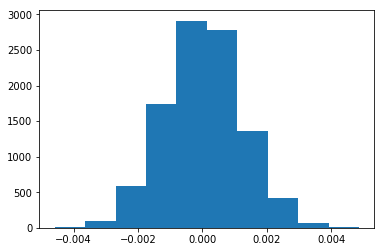

In [28]:
plt.hist(p_diffs);
print('The plot looks like a normal distribution, what it is expected.')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

Actual difference observed in data: -0.0015782389853555567
The plot represents the distribution of the difference between p_new and p_old, the vertical line is the actual difference of the data
This is the proportion of the p_diffs greater than the actual difference: 0.9066


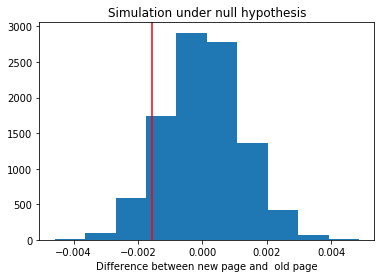

In [29]:
actual_diffs = df2[df2['group']=='treatment']['converted'].mean()- df2[df2['group']=='control']['converted'].mean()
print('Actual difference observed in data: {}'.format(actual_diffs))
plt.hist(p_diffs);
plt.title('Simulation under null hypothesis')
plt.xlabel('Difference between new page and  old page')
plt.axvline(actual_diffs,c='red');
print('The plot represents the distribution of the difference between p_new and p_old, the vertical line is the actual difference of the data')

proportion= p_diffs > actual_diffs
print('This is the proportion of the p_diffs greater than the actual difference: {}'.format(proportion.mean()))

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated above is the p-value, that is the probability of observing your statistic(or one more extreme in favor of the alternative) if the null hypothesis is true.If this value is .**

**This value means that following the null hipothesis.** 
$$ H_0: p_{old} - p_{new} \geq 0  $$

**And having a p-value greater than 5%,that is the maximun type I error that we can tolerate to reject the null hypothesis,for this reason we have no evidence to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()

17489

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

print('Old page converted {}, new page converted {}, old page {} and new page {}'.format(convert_old,convert_new,n_old,n_new))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Old page converted 17489, new page converted 17264, old page 145274 and new page 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print('score {} and p-value {}'.format(z_score,p_value))

score 1.3109241984234394 and p-value 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Yes, in case of the p-value putting "alternative ='smaller' " means equal than our alternative hypothesis, that new page converted rate is greater than old page converted rate and this return a p-value similar to the p-value calcuated before. For this we have no evidence to reject the null hypothesis.**

**Z-score is the statistic of our test.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should do a logistic regression, because the target is binary.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [34]:
df2['intercept']=1
df2[['ab_page','control']]=pd.get_dummies(df2['group'])
df2.drop('control',inplace=True, axis=1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
lm=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:02:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The p-value associated to ab_page is 0.190 and in this case means how statistically significant ab_page variable is.The variable will be better if it is closer to 0.**

**The null and alternative hypothesis are the following:**

$$  H_0: \beta_0=0 $$
$$  H_1: \beta_0 \neq 0 $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is important to consider other factors to add into our model in order to better fit our regression model. Also we can see the rise in R-square when we add factors for getting a better model.**

**One problem when we add more than one factor to our model is the multicollinearity, because it can produce errors with our models, for this reason we should calculate VIF in order to eliminate this problem if it exits.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns

In [37]:
df_country=pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
df_country.groupby('country')['user_id'].count()

country
CA     14499
UK     72466
US    203619
Name: user_id, dtype: int64

In [39]:
df3=0
df3=df2.join(df_country,how='inner',lsuffix='_rm')
df3.head()

,user_id_rm,timestamp,group,landing_page,converted,intercept,ab_page,user_id,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,834778,UK
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,928468,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,822059,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,711597,UK
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,710616,UK


In [40]:
df3[['UK','US','CA']]=pd.get_dummies(df3['country'])
#df3.drop(['CA','user_id_rm'],inplace=True, axis=1)

df3.head()

,user_id_rm,timestamp,group,landing_page,converted,intercept,ab_page,user_id,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,834778,UK,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,928468,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,822059,UK,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,711597,UK,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,710616,UK,0,1,0


In [41]:
lm_2=sm.Logit(df3['converted'],df3[['intercept','UK','US']])
result_2=lm_2.fit()

Optimization terminated successfully.
         Current function value: 0.366157
         Iterations 6


In [42]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286739
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:               6.218e-06
Time:                        14:02:09   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
                                        LLR p-value:                    0.5205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9964      0.007   -290.362      0.000      -2.010      -1.983
UK            -0.0261      0.027     -0.968      0.333      -0.079       0.027
US             0.0063      0.013      0.469      0.639      -0.020       0.033
==============================================================================
"""

**Adding two countries is not very significant, for instance US has a p-value = 0.639, which is far from 0**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
df3['ab_page_UK']=df3['ab_page']*df3['UK']
df3['ab_page_US']=df3['ab_page']*df3['US']



In [44]:
df3.head()

,user_id_rm,timestamp,group,landing_page,converted,intercept,ab_page,user_id,country,UK,US,CA,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,834778,UK,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,928468,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,822059,UK,0,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,711597,UK,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,710616,UK,0,1,0,0,1


In [45]:
lm_3=sm.Logit(df3['converted'],df3[['intercept','ab_page','UK','US','ab_page_UK','ab_page_US']])
result_3=lm_3.fit()
result_3.summary()

Optimization terminated successfully.
         Current function value: 0.366150
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286736
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:               2.708e-05
Time:                        14:02:10   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
                                        LLR p-value:                    0.3379
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0078      0.010   -205.795      0.000      -2.027      -1.989
ab_page        0.0229      0.014      1.667      0.096      -0.004       0.050
UK             0.0155      0.038      0.411      0.681      -0.058       0.089
US             0.0122      0.019      0.642      0.521      -0.025       0.050
ab_page_UK    -0.0839      0.054     -1.558      0.119      -0.189       0.022
ab_page_US    -0.0119      0.027     -0.444      0.657      -0.064       0.041
==============================================================================
"""

In [46]:
lm_better=sm.Logit(df3['converted'],df3[['intercept','ab_page','UK','ab_page_UK']])
better_result=lm_better.fit()
better_result.summary()

Optimization terminated successfully.
         Current function value: 0.366150
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286738
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:               2.512e-05
Time:                        14:02:11   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
                                        LLR p-value:                    0.1528
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0046      0.008   -239.289      0.000      -2.021      -1.988
ab_page        0.0198      0.012      1.678      0.093      -0.003       0.043
UK             0.0123      0.037      0.329      0.742      -0.061       0.085
ab_page_UK    -0.0808      0.053     -1.514      0.130      -0.185       0.024
==============================================================================
"""

**We do iteractions between variables and we find one interaction that we can add to our model so that it fits better, because it has a p-value close to 0 that is the iteration between ab_page and UK. A good model would have ab_page and UK variables and the interaction between them**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0